# So which country have external debt stocks prices tend to change in the same way?

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### 1. Importing Data

In [3]:
stocks = pd.read_csv("C:\\Users\\talfi\\python\\ML\\datasets\\stocks\\external_debt_stocks_total_from_gapminder.csv")

In [4]:
stocks.head()

,country,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.440000e+09,2.490000e+09,2.580000e+09,2.590000e+09,2.530000e+09,2.600000e+09,2.600000e+09,2.750000e+09,2.680000e+09,2.660000e+09
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.440000e+09,6.480000e+09,7.380000e+09,8.650000e+09,8.510000e+09,8.450000e+09,8.520000e+09,9.800000e+09,9.870000e+09,9.630000e+09
2,Algeria,9.400000e+08,1.260000e+09,1.550000e+09,2.990000e+09,3.370000e+09,4.630000e+09,6.110000e+09,1.060000e+10,1.570000e+10,...,7.250000e+09,6.050000e+09,5.520000e+09,5.250000e+09,5.520000e+09,4.670000e+09,5.460000e+09,5.710000e+09,5.710000e+09,5.490000e+09
3,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.660000e+10,3.400000e+10,4.430000e+10,5.490000e+10,5.690000e+10,5.630000e+10,5.680000e+10,5.090000e+10,5.190000e+10,5.250000e+10
4,Argentina,5.890000e+09,6.350000e+09,6.890000e+09,7.370000e+09,7.800000e+09,7.900000e+09,9.500000e+09,1.170000e+10,1.350000e+10,...,1.270000e+11,1.430000e+11,1.400000e+11,1.500000e+11,1.540000e+11,1.770000e+11,1.890000e+11,2.370000e+11,2.840000e+11,2.790000e+11


- Creating Country by removing country column from the stocks which is the only Object Column in the df that also doesn't have any Na values.
- This way, we can implement the `SimpleImputer` easier.

In [5]:
country = stocks.pop("country")

In [6]:
stocks.shape

(119, 50)

In [7]:
stocks.isnull().values.any()

True

#### 2. Replacing NA Values

In [8]:
from sklearn.impute import SimpleImputer
imr = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

imr = imr.fit(stocks)

imputed_data = imr.transform(stocks)
stocks = pd.DataFrame(imputed_data)
stocks = stocks.rename(index = country,columns={0:"country", 1:1970, 2:1971,3:1972,4:1923,5:1974,6:1975,7:1976,8:1977,9:1978,10:1979,11:1980,12:1981,13:1982,14:1983, 15:1984, 16:1985, 17:1986, 18:1987, 19:1988, 20:1989, 21:1990, 22: 1991, 23:1992, 24:1993, 25:1994, 26:1995, 27:1996, 28:1997, 29:1998, 30:1999, 31:2000, 32:2001, 33:2002, 34:2003, 35:2004, 36:2005, 37:2006, 38:2007, 39:2008, 40: 2009, 41:2010, 42:2011, 43:2012, 44:2013, 45:2014, 46:2015, 47:2016, 48:2017, 49:2018, 50:2019})
stocks.head(3)

,country,1970,1971,1972,1923,1974,1975,1976,1977,1978,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Afghanistan,119000000.0,1.530000e+08,1.580000e+08,2.150000e+08,0.000000e+00,1.480000e+08,1.620000e+07,1.730000e+08,1.020000e+09,1.170000e+09,...,2.440000e+09,2.490000e+09,2.580000e+09,2.590000e+09,2.530000e+09,2.600000e+09,2.600000e+09,2.750000e+09,2.680000e+09,2.660000e+09
Albania,119000000.0,1.530000e+08,1.580000e+08,2.150000e+08,0.000000e+00,1.480000e+08,1.620000e+07,1.730000e+08,1.020000e+09,1.170000e+09,...,5.440000e+09,6.480000e+09,7.380000e+09,8.650000e+09,8.510000e+09,8.450000e+09,8.520000e+09,9.800000e+09,9.870000e+09,9.630000e+09
Algeria,940000000.0,1.260000e+09,1.550000e+09,2.990000e+09,3.370000e+09,4.630000e+09,6.110000e+09,1.060000e+10,1.570000e+10,1.850000e+10,...,7.250000e+09,6.050000e+09,5.520000e+09,5.250000e+09,5.520000e+09,4.670000e+09,5.460000e+09,5.710000e+09,5.710000e+09,5.490000e+09


In [9]:
stocks.isnull().values.any()

False

#### 3. Figuring Out to How Many Clusters for the best practice

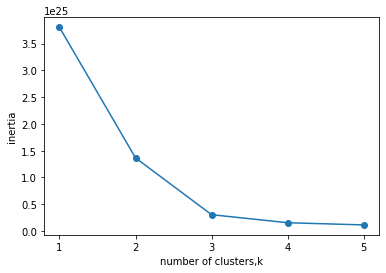

In [10]:
from sklearn.cluster import KMeans
ks = range(1,6)
inertias = []
for k in ks:
    model = KMeans(n_clusters = k)
    model.fit(stocks)
    inertias.append(model.inertia_)
plt.plot(ks, inertias, "-o")
plt.xlabel("number of clusters,k")
plt.ylabel("inertia")
plt.xticks(ks)
plt.show()

#### 4. Preprocessing Data
#### 5. Clustering External Debt Stock Prices
#### 6. Creating pipeline for effectiveness

In [11]:
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
normalize = Normalizer()
model = KMeans(n_clusters = 3)
pipeline = make_pipeline(normalize, model)
pipeline.fit(stocks)
labels = pipeline.predict(stocks)
labels

array([1, 1, 2, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 2, 0,
       2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 2, 2, 1,
       0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 2, 2, 2, 2,
       0, 2, 0, 0, 1, 0, 1, 0, 0, 2, 0, 2, 2, 2, 1, 0, 0, 0, 0, 2, 0, 0,
       0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 1, 1, 0, 0, 1, 2, 2, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 2, 0, 0])

#### 8. Figuring Out which country have external debt stocks prices tend to change in the same way

In [14]:
df = pd.DataFrame({'labels': labels, 'country': country})
df.sort_values(by="labels")

,labels,country
118,0,Zimbabwe
52,0,India
88,0,Samoa
90,0,Senegal
91,0,Serbia
...,...,...
65,2,Malawi
75,2,Myanmar
41,2,Gabon
92,2,Sierra Leone
